(dataM:tutorial:tesilData)=
# Tensile test analysis

## General scope

From global point of view, test machines, sensors provide time-stamped data. 
Most of the time this a data are stored in a tabular shape, i.e. one line for each record with its time-stamp.

A common way to store this data is to use '*.csv' file. A '*.cvs' file looks like:

```csv
time;data1;data2;data3
0.0;12.;.001;'blue'
0.1;11.5;.002;'red'
0.2;14.2;.004;'blue'
0.3;14.2;-.004;'green'
...
...
...
```

The `Pandas` module is a convenient way to manage this file (read and write).

In addition, metadata can be stored in this file, at the beginning of the file. 
In this metadata global info can be stored, as the date of the test, the name of the operator, the material, the sample type, commentary...

A total file can look like:

```csv
date : 01-02-1900
user : bob
material : Steel 
length : .5
remarks : This test is awsome

time;data1;data2;data3
0.0;12.;.001;'blue'
0.1;11.5;.002;'red'
0.2;14.2;.004;'blue'
0.3;14.2;-.004;'green'
...
...
...
```
## Session objective

In this session you are asked to analyze data coming from the tensile test.
This analysis aims at extracting the mechanical properties of the material, such as the Young modulus, mechanical strength and yield strength from the load/displacement curve.

At the end of this session, you should have a class that is able to deal with the data coming from a tensile test. 

## The dataset :

:::{admonition} Required files
:class: important
It can be downloaded at this link [TensileData](https://drive.google.com/drive/u/1/folders/1Kp-Omga2JykownLw2rureS9A-PhsSJMx).
:::

It contains 4 files, the ***unit are s/N/mm*** :

- Test_1.csv
- Test_2.csv
- Test_3.csv 
- Test_4.csv



In [1]:
# Setup
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

<IPython.core.display.Javascript object>


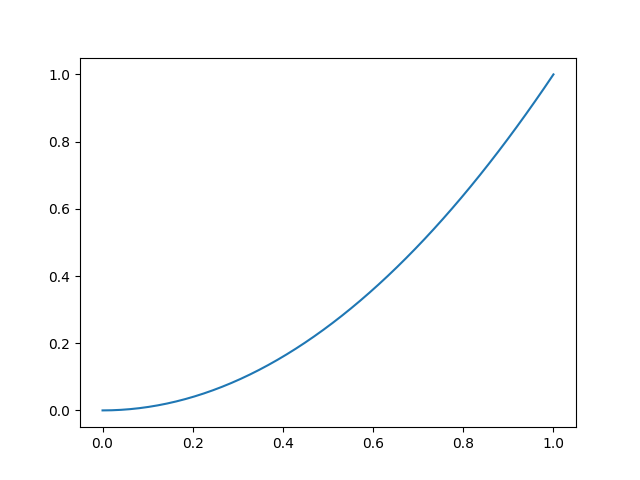

In [4]:
x = np.linspace(0,1,50)
plt.figure()
plt.plot(x, x**2)
plt.show()

### Q1 : Load the data and plot its
* code one function that loads one test
* call this function 4 times to load all data
* plot all the tests on one figure


In [118]:
def a_function(a, b, c = 0.1):
    x = a+b+c
    return x

print('a_function(1,2) =', a_function(1,2))

print('a_function(1,2, c=5) =', a_function(1,2, c=5))

a_function(1,2) = 3.1
a_function(1,2, c=5) = 8


In [123]:
def read_data(path_to_csv):
    df = pd.read_csv(path_to_csv, delimiter=';', skiprows = 2)
    return df

In [124]:
#unit test
read_data('Test_1.csv')

,Temps,Force,Course_Traverse,Ext,Largeur
0,0.00,-40.43579,0.000000,0.000000,0.000000
1,0.01,-40.43579,0.000021,0.000000,0.000000
2,0.02,-40.43579,0.000021,0.000000,0.000000
3,0.03,-40.43579,0.000021,0.000000,0.000000
4,0.04,-40.43579,0.000083,-0.000015,0.000571
...,...,...,...,...,...
19154,191.54,764.01230,6.383542,5.610752,0.331398
19155,191.55,763.47190,6.383875,5.610752,0.331398
19156,191.56,763.31300,6.384208,5.610752,0.331398
19157,191.57,762.64540,6.384521,5.610752,0.331398


In [136]:
# meta data
f = open('Test_1.csv')
l = f.readline()
l0 = float(l.split('=')[-1])
l = f.readline()
S0 = float(l.split('=')[-1])
print(f'S0={S0} mm²; l0={l0} mm')

S0=11.8 mm²; l0=45.2 mm


In [138]:
def read_metadata(path_to_csv):
    f = open(path_to_csv)
    l = f.readline()
    l0 = float(l.split('=')[-1])
    l = f.readline()
    S0 = float(l.split('=')[-1])
    return S0, l0

In [120]:
# recupérer le nom de tout les fichier xxx.csv du dossier
import glob
cvs_list = glob.glob('*.csv')

for path2csv in cvs_list:
    print(path2csv)

Test_1.csv
Test_3.csv
Test_4.csv
Test_2.csv


In [130]:
dfs = []
for path2csv in cvs_list:
    df = read_data(path2csv)
    dfs.append(df)

In [140]:
class TensileTest:
    """
    this class is able to ....
    """

    def __init__(self, csv_file):
        self.csv_file = csv_file
        self.df = read_data(self.csv_file)
        self.S0, self.l0 =read_metadata(self.csv_file)
        # CODDE HERE

    def __repr__(self):
        return "<tensileTest: (file: {0}, E = {1:.2} MPa)>".format(
            self.csv_file, self.get_YoungModulus()
        )

    def get_meca_strength(self):
        return 0.0

    def get_YoungModulus(self):
        # CODDE HERE
        return 1.0

In [142]:
t1 = TensileTest('Test_1.csv')
t1.S0

11.8

In [15]:
def a_function(a, b, c = 0.1):
    x = a+b+c
    return x

print('a_function(1,2) =', a_function(1,2))

print('a_function(1,2, c=5) =', a_function(1,2, c=5))

a_function(1,2) = 3.1
a_function(1,2, c=5) = 8


In [9]:
import glob
cvs_list = glob.glob('*.csv')

for path2csv in cvs_list:
    print(path2csv)

Test_1.csv
Test_3.csv
Test_4.csv
Test_2.csv


In [62]:
def read_data(path_to_csv="my_csv.csv"):
    df = pd.read_csv(path_to_csv, delimiter=';', skiprows=2)
    return df

In [63]:
#unit test
read_data('Test_1.csv')

,Temps,Force,Course_Traverse,Ext,Largeur
0,0.00,-40.43579,0.000000,0.000000,0.000000
1,0.01,-40.43579,0.000021,0.000000,0.000000
2,0.02,-40.43579,0.000021,0.000000,0.000000
3,0.03,-40.43579,0.000021,0.000000,0.000000
4,0.04,-40.43579,0.000083,-0.000015,0.000571
...,...,...,...,...,...
19154,191.54,764.01230,6.383542,5.610752,0.331398
19155,191.55,763.47190,6.383875,5.610752,0.331398
19156,191.56,763.31300,6.384208,5.610752,0.331398
19157,191.57,762.64540,6.384521,5.610752,0.331398


<IPython.core.display.Javascript object>


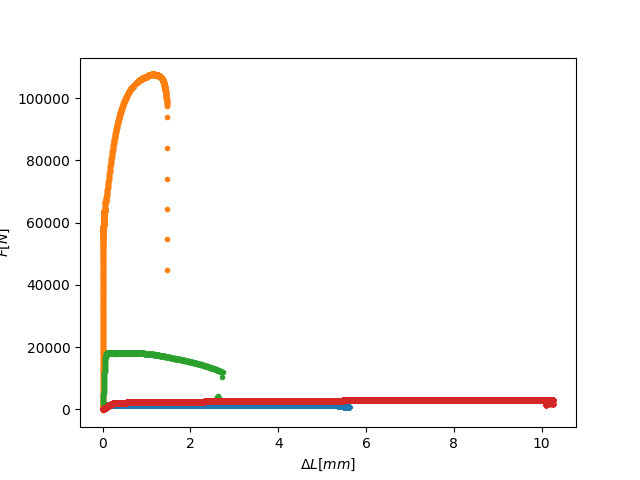

In [68]:
tests = []

for path2csv in cvs_list:
    df = read_data(path2csv)
    tests.append(df)

    
plt.figure()
for df in tests:
    plt.plot(df.Ext, df.Force,'.')
plt.xlabel('$\Delta L[mm]$')
plt.ylabel('$F [N]$')
plt.show()

### Q2: Load the metadata
Into the '.csv' file the first 2 line provides $S_0$ and $l_0$ of each sample.

* code a function that read this data
* call this function on each test

#### Useful function 

:::{admonition} Tip: split a string into 2 parts
:class: tip
```python
line = "z = 143.2"
word1, word2 = line.split("=")
```

In [69]:
f = open('Test_1.csv')
l = f.readline()
l0 = float(l.split('=')[-1])
l = f.readline()
S0 = float(l.split('=')[-1])
print(f'S0={S0} mm²; l0={l0} mm')

S0=11.8 mm²; l0=45.2 mm


In [70]:
def read_metadata(path_to_csv="my_csv.csv"):
    f = open(path_to_csv)
    l = f.readline()
    l0 = float(l.split('=')[-1])
    l = f.readline()
    S0 = float(l.split('=')[-1])
    return S0, l0

In [71]:
#unit test
read_metadata('Test_1.csv')

(11.8, 45.2)

In [143]:
# Class
class TensileTest:
    """
    this class is able to ....
    """

    def __init__(self, csv_file="xxx"):
        print("Init with file " + csv_file)
        self.csv_file = csv_file
        # read the data
        self.df = read_data(self.csv_file)
        S0, l0 = read_metadata(self.csv_file)
        self.S0 = S0
        self.l0 = l0
        # compute stress and strain
        self.df["stress"] = self.df.Force / S0
        self.df["strain"] = self.df.Ext / l0
        

    def __repr__(self):
        return "<tensileTest: (file: {0}, E = {1:.2} MPa)>".format(
            self.csv_file, self.get_YoungModulus()
        )
    def plot(self, ax=None):
        E, off_set = self.get_YoungModulus()
        if ax is None:
            fig, ax = plt.subplots()
        ax.plot(self.df.strain, self.df.stress,'.', label = self.csv_file + f'E={E/1000:0.2f} GPa')
        e_max, s_max = self.get_meca_strength()
        ax.plot(e_max, s_max, 'xr')
        eps =np.array([0,0.003])
        
        ax.plot(eps, E*eps+off_set, 'k')
        #ax.plot(self.df.Ext, self.df.Force,'.', label = self.csv_file)
        plt.legend()
        return ax

    def get_meca_strength(self):
        id_max = self.df.stress.argmax()
        return self.df.strain[id_max], self.df.stress[id_max]

    def get_YoungModulus(self, coef = 3.):
        e_max, s_max = self.get_meca_strength()
        df_e = self.df[(self.df.stress<s_max/coef) & (self.df.strain<e_max) ]
        fit = np.polyfit(df_e.strain, df_e.stress,1)
        E = fit[0]
        off_set = fit[1]
        return E, off_set

Init with file Test_1.csv
Init with file Test_3.csv
Init with file Test_4.csv
Init with file Test_2.csv


<IPython.core.display.Javascript object>


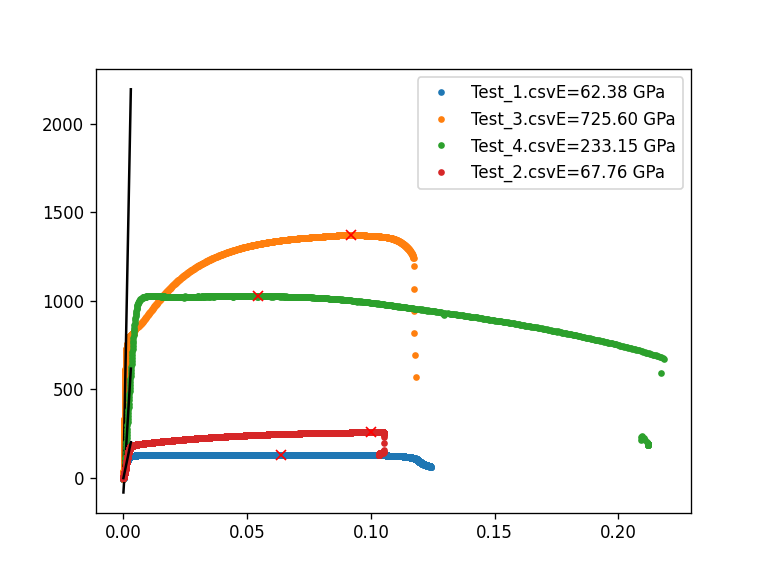

In [144]:
tests = []
for path2csv in cvs_list:
    t = TensileTest(path2csv)
    tests.append(t)
ax= None
for t in tests:
    ax = t.plot(ax=ax)

### Q3: Stress/Strain curve
Knowing that:
$
\sigma_n = \frac{F}{S0}
$
and 
$
\epsilon_n = \frac{\Delta L}{L_0}
$:

* Code a function that computes the strain and stress data.
* Apply the function to all tests.
* Plot this data for all test on a graph.



### Q4: Mechanilca strength
* Code a function that computes the mechanical strength.
* Apply the function to all tests.
* Plot this data for all test on a graph.

### Q5: Young modulus measurements
* Code a function that computes the young modulus on each test.
* Apply the function to all tests.
* Propose a plot to illustrate the young modulus measurements

In [ ]:
def get_young_modulus(df):
    E = 0.0
    return E

### Q6: all together in a class
Include all the function you have coded in a class.

Below is a simple template of the class that you should build :

In [ ]:
class TensileTest:
    """
    this class is able to ....
    """

    def __init__(self, csv_file="xxx"):
        self.csv_file = csv_file
        # CODDE HERE

    def __repr__(self):
        return "<tensileTest: (file: {0}, E = {1:.2} MPa)>".format(
            self.csv_file, self.get_YoungModulus()
        )

    def get_meca_strength(self):
        return 0.0

    def get_YoungModulus(self):
        # CODDE HERE
        return 1.0

In [ ]:
test1 = TensileTest("my_csv.csv")  # call the __init__ function

In [ ]:
test1  # call the __repr__ function

### Q7: The plastic side of the force
- compute the plastique strain ($\varepsilon_p = \varepsilon - \dfrac{\sigma}{E} $)
- fit the stress / plastic strain curve with a power plastic law ($\sigma = \sigma_0 + K {\varepsilon_p}^n $) 